<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula01b_perceptron_bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt

def plotDataset(X, y):
  plt.scatter(X[:,0], X[:,1], c=y)
  plt.xlim(0, 1)
  plt.ylim(0, 1)


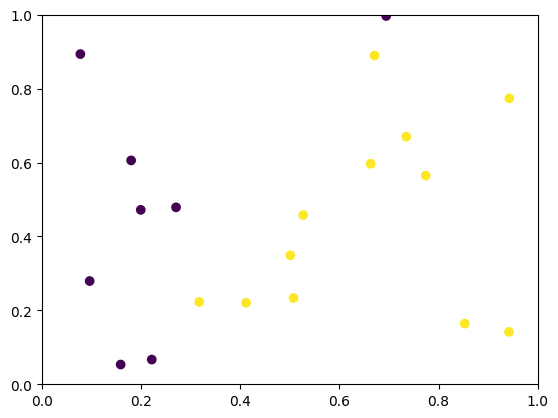

In [6]:
import numpy as np

def criaDataset(n=20, slop=[2,1], intercept=-0.4):
  X = np.random.uniform(size=(n,2))
  AUX = X * np.array(slop) - [0, intercept]
  y = np.array(AUX[:,0]>AUX[:,1], dtype=int)*2-1
  return X, y

X, y = criaDataset()
plotDataset(X, y)
plt.show()

In [7]:
def plotHiperplano(vector):
  xs = np.array([0, 1])
  ys = -(vector[0]*xs)/vector[1]
  plt.plot(xs, ys, 'r-')


In [8]:
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score

def sign(a):
  return (a>=0)*2-1


[ 9.10785725 -7.02622486]
0.85


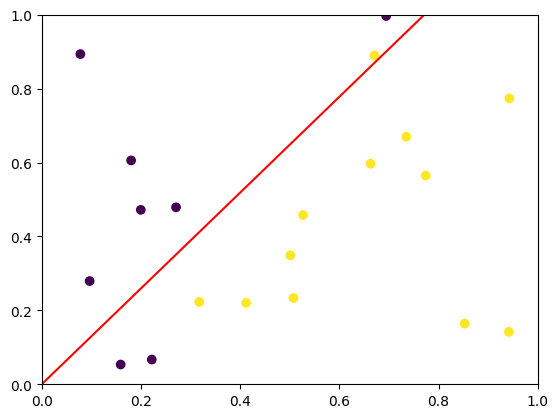

In [18]:
class Perceptron(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=100):
    self.epochs = range(epochs)

  def fit(self, X, y):
    self.w = np.random.uniform(size=X.shape[1])*2-1
    for _ in self.epochs:
        ypred = sign(X @ self.w)
        error = y-ypred
        self.w += X.T @ error
        cost = sum(error**2)
        if cost == 0:
          break
    return self

  def predict(self, X):
    return sign(X @ self.w)

model = Perceptron()
model.fit(X, y)
ypred = model.predict(X)
print(model.w)
print(accuracy_score(y, ypred))
plotDataset(X, y)
plotHiperplano(vector=model.w)
plt.show()

In [27]:
def include_bias(X):
  bias = np.ones((X.shape[0],1))
  Xb = np.concatenate((bias, X), axis=1)
  return Xb

class Perceptron(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=100):
    self.epochs = range(epochs)

  def fit(self, X, y):
    Xb = include_bias(X)
    self.w = np.random.uniform(size=Xb.shape[1])*2-1
    for _ in self.epochs:
        ypred = sign(Xb @ self.w)
        error = y-ypred
        self.w += Xb.T @ error
        cost = sum(error**2)
        if cost == 0:
          break
    return self

  def predict(self, X):
    Xb = include_bias(X)
    return sign(Xb @ self.w)

model = Perceptron()
model.fit(X, y)
ypred = model.predict(X)
print(model.w)
print(accuracy_score(y, ypred))


[-10.644696    38.08192998 -16.57482391]
0.95


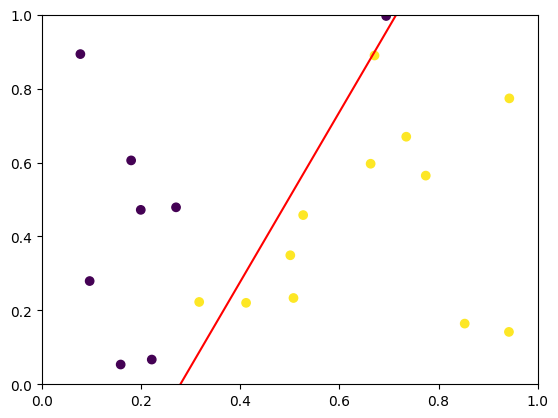

In [31]:
def plotHiperplano(vector, intercept=-0.4):
  xs = np.array([0, 1])
  ys = -(vector[0]*xs+intercept)/vector[1]
  plt.plot(xs, ys, 'r-')

plotDataset(X, y)
plotHiperplano(vector=model.w[1:], intercept=model.w[0])
plt.show()

0.997


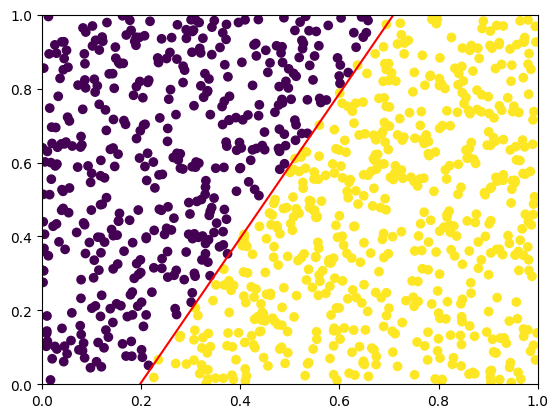

In [33]:
Xtrain, ytrain = criaDataset(n=20)
model = Perceptron()
model.fit(Xtrain, ytrain)
Xtest, ytest = criaDataset(n=1000)
ypred = model.predict(Xtest)
print(accuracy_score(ytest, ypred))
plotDataset(Xtest, ytest)
plotHiperplano(vector=model.w[1:], intercept=model.w[0])
plt.show()

0.992


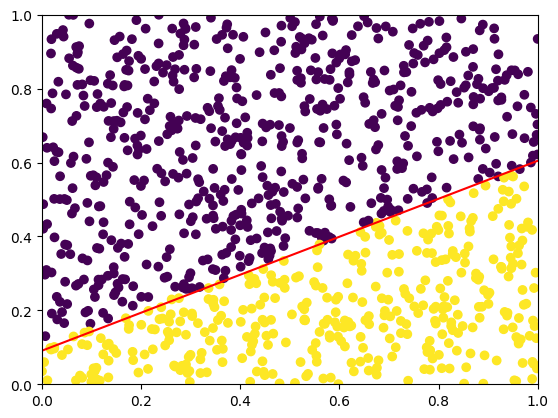

In [35]:
Xtrain, ytrain = criaDataset(n=20, slop=[1,2], intercept=0.2)
model = Perceptron()
model.fit(Xtrain, ytrain)
Xtest, ytest = criaDataset(n=1000, slop=[1,2], intercept=0.2)
ypred = model.predict(Xtest)
print(accuracy_score(ytest, ypred))
plotDataset(Xtest, ytest)
plotHiperplano(vector=model.w[1:], intercept=model.w[0])
plt.show()

0.975


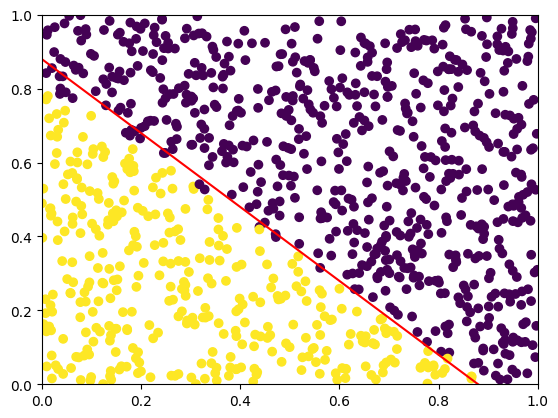

In [40]:
slop, intercept = [-1,1.1], 0.9
Xtrain, ytrain = criaDataset(n=20, slop=slop, intercept=intercept)
model = Perceptron()
model.fit(Xtrain, ytrain)
Xtest, ytest = criaDataset(n=1000, slop=slop, intercept=intercept)
ypred = model.predict(Xtest)
print(accuracy_score(ytest, ypred))
plotDataset(Xtest, ytest)
plotHiperplano(vector=model.w[1:], intercept=model.w[0])
plt.show()

In [41]:
model.w

array([ 15.6739683 , -17.81409547, -17.81024896])